# API VK

__API (Application Programming Interface__ — это уже готовый код, который можно всунуть в свой код! Многие сервисы, в том числе Google и Вконтакте, предоставляют свои уже готовые решения для вашей разработки.

Примеры: 

* [Контактовский API](https://vk.com/dev/methods)
* [API twitter](https://developer.twitter.com/en/docs.html) - nope
* [API youtube](https://developers.google.com/youtube/v3/) 
* [API google maps](https://developers.google.com/maps/documentation/) 
* [Aviasales](https://www.aviasales.ru/API)
* [Yandex Translate](https://yandex.ru/dev/translate/)

Оно есть почти везде! На этом семинаре мы посмотрим на два примера: на API контакта и google maps.

## 3.1 API vk

Зачем может понадобиться доступ к API контакта, думаю, объяснять не надо. Социальная сетка — это тонны различной полезной информации, которую можно заиспользовать для своих целей. [В документации](https://vk.com/dev/manuals) очень подробно описано как можно работать с API контакта и к чему это приводит. 

Но для начала к API нужно получить доступ. Для этого придётся пройти пару бюрократических процедур (о, боже, эти два предложения были так бюрократически сформулированы, что мне захотелось отстоять в очереди).

Первая такая процедура заключается в создании своего приложения. Для этого переходим по [ссылке](http://vk.com/editapp?act=create) и проходимся по необходимым шагам:

<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_1.png" width="500">

После подтверждения своей личности по номеру телефона, попадаем на страницу свежесозданного приложения

<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_2.png" width="500">

Слева нам будем доступна вкладка с настройками, перейдя в неё мы увидим все необходимые нам для работы с приложением параметры:
<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_3.png" width="500">

Отсюда в качестве токена можно забрать сервисный ключ доступа. Для работы с частью методов API этого вполне достаточно (обычно в заголовке такого метода стоит соответствующая пометка). Иногда нужны дополнительные доступы. Для того, чтобы получить их, необходимо сделать ещё пару странных манипуляций:

Переходим по ссылке вида (на месте звездочек должен стоять ID созданного вами приложения):

> https://oauth.vk.com/authorize?client_id=**********&scope=8198&redirect_uri=https://oauth.vk.com/blank.html&display=page&v=5.16&response_type=token

В итоге по этому запросу будет сформирована ссылка следующего вида:
> https://oauth.vk.com/blank.html#access_token=25b636116ef40e0718fe4d9f382544fc28&expires_in=86400&user_id=*******

Первый набор знаков — `access token`, т.е. маркер доступа. Вторая цифра (`expires_in=`) время работы маркера доступа в секундах (одни сутки). По истечению суток нужно будет получить новый маркер доступа. Последняя цифра (`user_id=`) ваш ID Вконтакте. Нам в дальнейшем понадобится маркер доступа. Для удобства сохраним его в отдельном файле или экспортируем в глобальную область видимости. В целях безопасности ваших данных не стоит нигде светить токенами и тем более выкладывать их в открытый доступ. __Так можно и аккаунта случайно лишиться.__ Берегите токен смолоду. 

Обратите внимание на ссылку, по которой мы делали запрос на предоставление токена. Внутри неё находится странный параметр `scope=8198.` Это мы просим доступ к конкретным разделам. Подробнее познакомиться с взаимно-однозначным соответствием между числами и правами можно [в документации.](https://vk.com/dev/permissions) Например, если мы хотим получить доступ к друзьям, фото и стенам, мы подставим в scope цифру 2+4++8192=8198.

In [1]:
import requests

In [2]:
# мой номер странички
myid = '153433657'  # вставить номер странички

# версия используемого API
version = '5.103' 
token = '9c1bcfcb9c1bcfcb9c1bcfcbfb9c673f4d99c1b9c1bcfcbfe846612e51341b8587ce44a'


In [3]:
requests.get(f'https://api.vk.com/method/users.get?user_id=153433657&v={version}&access_token={token}').json()

{'response': [{'id': 153433657,
   'first_name': 'Yan',
   'last_name': 'Pile',
   'can_access_closed': True,
   'is_closed': False}]}

Чтобы скачать что-то из контакта, надо сделать ссылку и сходить по ней пакетом `requests`. Ссылка должна будет включать в себя метод (что мы просим у вк) и параметры (насколько много и как именно). Мы будем просто заменять эти две штуки и выкачивать разные вещи. 

In [4]:
method = 'users.get'
parameters = 'user_ids=80406183'

url = 'https://api.vk.com/method/' + method + '?' + parameters + '&v=' + version + '&access_token=' + token

response = requests.get(url) 
response.json()

{'response': [{'id': 80406183,
   'first_name': 'Margarita',
   'last_name': 'Burova',
   'can_access_closed': True,
   'is_closed': False}]}

В ответ на наш запрос vk выкидывает JSON с информацией. JSON очень похож на питонячие словарики. Смысл квадратных и фигурных скобок такой же. Правда, есть и отличия: например, в Python одинарные и двойные кавычки ничем не отличаются, а в JSON можно использовать только двойные. 

Мы видим, что полученный нами JSON представляет собой словарь, значения которого — строки или числа, а также списки или словари, значения которых в свою очередь также могут быть строками, числами, списками, словарями и т.д. То есть получается такая довольно сложная структура данных, из которой можно вытащить всё то, что нас интересует. 

In [5]:
response.json()['response'][0]['first_name']

'Margarita'

[В документации](https://vk.com/dev/manuals) очень подробно описано какие есть методы и какие у них бывают параметры.  Давайте завернём код выше в функцию и попробуем что-нибудь скачать.

In [7]:
def vk_download(method, parameters):
    
    url = 'https://api.vk.com/method/' + method + '?' + parameters + '&access_token=' + token + '&v=' + version
    response = requests.get(url) 
    infa = response.json()
    return infa

Например, все лайки с [хайер скул оф мемс.](https://vk.com/hsemem)
Как найти адрес страницы [тут](https://vk.com/faq18062)

In [9]:
group_id = '-139105204'  # взяли из ссылки на группу

In [10]:
wall = vk_download('wall.get', 'owner_id={}&count=100'.format(group_id))
wall = wall['response']

In [11]:
wall['items'][10]

{'inner_type': 'wall_wallpost',
 'comments': {'count': 0},
 'marked_as_ads': 0,
 'hash': 'YyC-aJbxgY7QLeP_Yw',
 'type': 'post',
 'push_subscription': {'is_subscribed': False},
 'donut_miniapp_url': 'https://vk.com/app51528700#/?owner_id=-139105204&type=donut_badges&params=%257B%2522item_id%2522%253A%2522101785%2522%257D',
 'attachments': [{'type': 'photo',
   'photo': {'album_id': -7,
    'date': 1739882985,
    'id': 457269772,
    'owner_id': -139105204,
    'access_key': '41ec4acf3bed354bab',
    'post_id': 101779,
    'sizes': [{'height': 61,
      'type': 's',
      'width': 75,
      'url': 'https://sun9-21.userapi.com/s/v1/ig2/UXxzN3rNeRDQ-U3BWpfQmeQ1IKvUz48UXUGY_DUAYuAbK3tHaT0fY3Xj9271BCs7aRwR-oM4-hwnFVP-YZjRAkGr.jpg?quality=95&as=32x26,48x39,72x59,108x88,160x130,240x195,360x293,480x391,540x439,640x521,720x586,736x599&from=bu&cs=75x61'},
     {'height': 106,
      'type': 'm',
      'width': 130,
      'url': 'https://sun9-21.userapi.com/s/v1/ig2/UXxzN3rNeRDQ-U3BWpfQmeQ1IKvUz48

In [14]:
post = vk_download('wall.getComments', 'owner_id={}&post_id=100950'.format(group_id))

In [15]:
post

{'response': {'count': 1,
  'items': [{'id': 100954,
    'from_id': -139105204,
    'date': 1710591208,
    'text': 'больше мемов про ВШЭ в нашем тг — https://t.me/hse_mem 🔥',
    'post_id': 100950,
    'owner_id': -139105204,
    'parents_stack': [],
    'attachments': [{'type': 'link',
      'link': {'url': 'https://t.me/hse_mem',
       'caption': 't.me',
       'description': 'за годными мемами только сюда🔥 vk.me/hsemem Реклама: vk.me/cosmosalpha',
       'title': 'хайер скул оф мемс'}}],
    'thread': {'count': 0,
     'items': [],
     'can_post': False,
     'show_reply_button': False,
     'groups_can_post': True},
    'is_from_post_author': True}],
  'current_level_count': 1,
  'can_post': False,
  'show_reply_button': False,
  'groups_can_post': True}}

In [16]:
post['response']['items']

[{'id': 100954,
  'from_id': -139105204,
  'date': 1710591208,
  'text': 'больше мемов про ВШЭ в нашем тг — https://t.me/hse_mem 🔥',
  'post_id': 100950,
  'owner_id': -139105204,
  'parents_stack': [],
  'attachments': [{'type': 'link',
    'link': {'url': 'https://t.me/hse_mem',
     'caption': 't.me',
     'description': 'за годными мемами только сюда🔥 vk.me/hsemem Реклама: vk.me/cosmosalpha',
     'title': 'хайер скул оф мемс'}}],
  'thread': {'count': 0,
   'items': [],
   'can_post': False,
   'show_reply_button': False,
   'groups_can_post': True},
  'is_from_post_author': True}]

In [17]:
wall['items'][0].keys()

dict_keys(['inner_type', 'comments', 'marked_as_ads', 'hash', 'type', 'push_subscription', 'donut_miniapp_url', 'attachments', 'date', 'from_id', 'id', 'likes', 'owner_id', 'post_type', 'reposts', 'text', 'views'])

In [18]:
wall['items'][0]['comments']

{'count': 0}

In [19]:
wall['items'][0]['likes']['count']

68

In [20]:
likes = [item['likes']['count'] for item in wall['items']]
likes[:10]

[68, 73, 173, 127, 63, 180, 147, 323, 106, 108]

За один запрос скачалось всего-лишь $100$ постов с лайками. В паблике их целых

In [21]:
wall['count']

1542

[Документация](https://vk.com/dev/manuals) говорит, что есть параметр `offset`, с помощью которого можно указать какие именно посты из группы нужно скачать. Например, если мы укажем `offset = 100`, скачается вторая сотня. Наше дело за малым: написать цикл. 

In [22]:
likes = []

from tqdm import tqdm

In [23]:
import time

likes = [ ] # сюда буду сохранять лайки

for offset in tqdm(range(0, 4800, 100)):
    
    time.sleep(0.4) # вк согласен работать 3 раза в секунду, 
                    # между запросами python спит 0.4 секунды
    
    wall = vk_download('wall.get', 'owner_id={}&count=100&offset={}'.format(group_id, offset))
    
    likes.extend([item['likes']['count'] for item in wall['response']['items']])

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:39<00:00,  1.22it/s]


Лайки в наших руках. Можем даже посмотреть на их распределение и попробовать что-то с ними сделать. 

In [24]:
len(likes)

1543

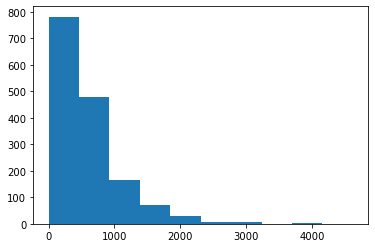

In [25]:
import matplotlib.pyplot as plt 

plt.hist(likes);

В принципе похожим образом можно скачать что угодно.

### Хитрость:  pd.read_html

Если на странице, которую вы спарсили, среди тэгов `<tr>` и `<td>` прячется таблица, чаще всего можно забрать её себе без написания цикла, который будет перебирать все стобцы и строки. Поможет в этом `pd.read_html`. Например, вот так можно забрать себе [табличку с сайта ЦБ](https://cbr.ru/currency_base/daily/) 

In [26]:
import pandas as pd
from bs4 import BeautifulSoup

df = pd.read_html('https://cbr.ru/currency_base/daily/')[0]
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,543380
1,944,AZN,1,Азербайджанский манат,509217
2,51,AMD,100,Армянских драмов,219691
3,764,THB,10,Батов,255405
4,933,BYN,1,Белорусский рубль,272480


Команда пытается собрать в массив все таблички c веб-страницы. Если хочется, можно сначала через bs4 найти нужную таблицу, а потом уже распарсить её: 

In [28]:
resp = requests.get('https://cbr.ru/currency_base/daily/')
tree = BeautifulSoup(resp.content, 'html.parser')

# нашли табличку
table = tree.find_all('table', {'class' : 'data'})[0]

# распарсили её
df = pd.read_html(str(table))[0]
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,543380
1,944,AZN,1,Азербайджанский манат,509217
2,51,AMD,100,Армянских драмов,219691
3,764,THB,10,Батов,255405
4,933,BYN,1,Белорусский рубль,272480


## Что делать, если сервер разозлился

* Вы решили собрать себе немного данных
* Сервер не в восторге от ковровой бомбардировки автоматическими запросами
* Error 403, 404, 504, 
* Капча, требования зарегистрироваться
* Заботливые сообщения, что с вашего устройства обнаружен подозрительный трафик

## а) быть терпеливым 

* Слишком частые запросы раздражают сервер
* Ставьте между ними временные задержки 

In [30]:
import time
time.sleep(3) # и пусть весь мир подождёт 3 секунды

In [31]:
import random

random.random()*3

1.8179469610473267

## б) быть похожим на человека


Запрос нормального человека через браузер выглядит так: 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/browser_get.png" width="600"> 
    
С ним на сервер попадает куча информации! Запрос от питона выглядит так: 


<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/python_get.jpg" width="250"> 
 
Заметили разницу?  Очевидно, что нашему скромному запросу не тягаться с таким обилием мета-информации, которое передается при запросе из обычного браузера. К счастью, никто нам не мешает притвориться человечными и пустить пыль в глаза сервера при помощи генерации фейкового юзер-агента. Библиотек, которые справляются с такой задачей, существует очень и очень много, лично мне больше всего нравится [fake-useragent.](https://pypi.org/project/fake-useragent/) При вызове метода из различных кусочков будет генерироваться рандомное сочетание операционной системы, спецификаций и версии браузера, которые можно передавать в запрос:

In [52]:
!pip install fake_useragent==1.5.1

  Attempting uninstall: fake-useragent
    Found existing installation: fake-useragent 2.0.0
    Uninstalling fake-useragent-2.0.0:
      Successfully uninstalled fake-useragent-2.0.0


In [53]:
import requests

In [40]:
url = 'https://habr.com/ru/'  # адрес страницы, которую мы хотим скачать
user_agent = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)'  # хотим притворяться браузером

response = requests.get("https://habr.com/ru/", headers={'User-Agent':user_agent})

In [54]:

#from fake_useragent import UserAgent
from fake_useragent import UserAgent

In [55]:
user_agent = UserAgent().chrome
user_agent

'Mozilla/5.0 (Linux; Android 11; moto e20 Build/RONS31.267-94-14) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.6261.64 Mobile Safari/537.36'

In [57]:
response = requests.get("https://habr.com/ru/", headers={'User-Agent':user_agent})

## в) общаться через посредников

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/proxy.jpeg" width="400"> 

In [58]:
r = requests.get('http://httpbin.org/ip')
print(r.json())

{'origin': '89.175.46.44'}


In [59]:
http_proxy  = "http://203.24.109.132:80"
https_proxy = "https://204.150.180.9"
#ftp_proxy   = "ftp://10.10.1.10:3128"

proxies = { 
              "http"  : http_proxy, 
              "https" : https_proxy, 
             # "ftp"   : ftp_proxy
            }

r = requests.get('https://httpbin.org/ip', proxies=proxies)

print(r.json())

ProxyError: HTTPSConnectionPool(host='httpbin.org', port=443): Max retries exceeded with url: /ip (Caused by ProxyError('Cannot connect to proxy.', NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000278F93AC460>: Failed to establish a new connection: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера')))